# Analytical Notebook
Here I analyze the results from prior notebooks, and calculate the coherence and cosine similarity scores.  


In [1]:
!pip install -q datasets

     |████████████████████████████████| 365 kB 7.5 MB/s 
     |████████████████████████████████| 212 kB 53.5 MB/s 
     |████████████████████████████████| 141 kB 84.2 MB/s 
     |████████████████████████████████| 101 kB 14.8 MB/s 
     |████████████████████████████████| 596 kB 80.9 MB/s 
     |████████████████████████████████| 127 kB 79.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
!pip install rouge_score


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24955 sha256=90993ffc3ffffcc52de4d267b3ecd4d298fa35b290929f3bf3bf7e646abbbbb8
  Stored in directory: /root/.cache/pip/wheels/84/ac/6b/38096e3c5bf1dc87911e3585875e21a3ac610348e740409c76
Successfully built rouge-score


In [3]:
import pandas as pd

In [4]:
from datasets import load_dataset
from datasets import load_metric

In [ ]:
import matplotlib.pyplot as plt

In [20]:
import json

download the pre-processed data.
This got labeled as "train" split automatically by Huggingface. however this is the "test" split of the CNN/DailyMail dataset.

In [5]:
# download the dataset
# download rouge
# 
dataset = load_dataset("nschantz21/cnn_dailymail-parsed-processed", split="train")

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Using custom data configuration nschantz21--cnn_dailymail-parsed-processed-154b1388ba279ae9


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/nschantz21___parquet/nschantz21--cnn_dailymail-parsed-processed-154b1388ba279ae9/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


In [6]:
rouge_score = load_metric("rouge")

# Load Summaries
I load the pre-generated summaries here

In [7]:
baseline = pd.read_csv("/content/drive/MyDrive/NLPFinal/Take2/Summaries/distill-bart-baselines.csv", index_col=0)
everyother = pd.read_csv("/content/drive/MyDrive/NLPFinal/Take2/Summaries/dsbart-everyother.csv", index_col=0)
bme = pd.read_csv("/content/drive/MyDrive/NLPFinal/Take2/Summaries/dsbart-bme.csv", index_col=0)
bme25 = pd.read_csv("/content/drive/MyDrive/NLPFinal/Take2/Summaries/dsbart-bme25.csv", index_col=0)

bme75 = pd.read_csv("/content/drive/MyDrive/NLPFinal/Take2/Summaries/dsbart-bme75.csv", index_col=0)
random_sample = pd.read_csv("/content/drive/MyDrive/NLPFinal/Take2/Summaries/dsbart-random.csv", index_col=0)

In [8]:
summaries_frame = pd.concat(
    [
     baseline, 
     everyother, 
     bme, 
     random_sample,
    bme25,
     bme75], axis=1
)
summaries_frame.columns = ["baseline", "skip", "bme50", "random", "bme25", "bme75"]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f625e827b10>,
      dtype=object)

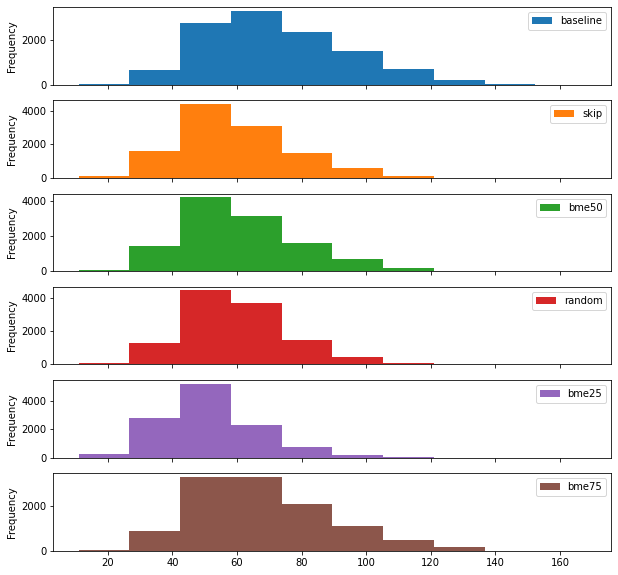

In [9]:
summaries_frame.applymap(lambda x: len(x.split(" "))).plot(kind="hist", subplots=True, figsize=(10, 10))

I generate the Lead3 summary here

In [11]:
dataset = dataset.map(lambda x: {"lead3": " ".join(x["article_sent"][:3])})

  0%|          | 0/11490 [00:00<?, ?ex/s]

In [12]:
dataset_frame = dataset.to_pandas()

In [13]:
all_data = dataset_frame.join(summaries_frame)

In [14]:
# grab a random sample for human assessment of summary quality
sample_summary = all_data.sample(1)
sample_summary.to_csv("sample_summary.csv")

In [15]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11490 entries, 0 to 11489
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   article             11490 non-null  object
 1   highlights          11490 non-null  object
 2   id                  11490 non-null  object
 3   article_sent        11490 non-null  object
 4   article_sent_len    11490 non-null  int64 
 5   article_sent_words  11490 non-null  object
 6   everyother          11490 non-null  object
 7   random_sent         11490 non-null  object
 8   beg_mid_end         11490 non-null  object
 9   beg_mid_end75       11490 non-null  object
 10  beg_mid_end25       11490 non-null  object
 11  lead3               11490 non-null  object
 12  baseline            11490 non-null  object
 13  skip                11490 non-null  object
 14  bme50               11490 non-null  object
 15  random              11490 non-null  object
 16  bme25               11

In [16]:
all_data.head()

,article,highlights,id,article_sent,article_sent_len,article_sent_words,everyother,random_sent,beg_mid_end,beg_mid_end75,beg_mid_end25,lead3,baseline,skip,bme50,random,bme25,bme75
0,(CNN)The Palestinian Authority officially beca...,Membership gives the ICC jurisdiction over all...,f001ec5c4704938247d27a44948eebb37ae98d01,[(CNN)The Palestinian Authority officially bec...,80,"[[(CNN)The, Palestinian, Authority, officially...",(CNN)The Palestinian Authority officially beca...,"The United States also said it ""strongly"" disa...",(CNN)The Palestinian Authority officially beca...,(CNN)The Palestinian Authority officially beca...,(CNN)The Palestinian Authority officially beca...,(CNN)The Palestinian Authority officially beca...,The Palestinian Authority becomes the 123rd m...,The Palestinian Authority becomes the 123rd m...,The Palestinian Authority becomes the 123rd m...,The formal accession was marked with a ceremo...,The Palestinian Authority becomes 123rd membe...,The Palestinian Authority becomes the 123rd m...
1,(CNN)Never mind cats having nine lives. A stra...,"Theia, a bully breed mix, was apparently hit b...",230c522854991d053fe98a718b1defa077a8efef,"[(CNN)Never mind cats having nine lives., A st...",170,"[[(CNN)Never, mind, cats, having, nine, lives....",(CNN)Never mind cats having nine lives. That's...,The veterinary hospital's Good Samaritan Fund ...,(CNN)Never mind cats having nine lives. A stra...,(CNN)Never mind cats having nine lives. A stra...,(CNN)Never mind cats having nine lives. A stra...,(CNN)Never mind cats having nine lives. A stra...,Theia is a one-year-old bully breed mix who w...,Theia is a white-and-black bully breed mix no...,"The dog was hit by a car, apparently killed a...",Theia is only one year old but the dog's brus...,A stray dog in Washington State has used up a...,"Theia was hit by a car, apparently killed by ..."
2,"(CNN)If you've been following the news lately,...",Mohammad Javad Zarif has spent more time with ...,4495ba8f3a340d97a9df1476f8a35502bcce1f69,[(CNN)If you've been following the news lately...,241,"[[(CNN)If, you've, been, following, the, news,...","(CNN)If you've been following the news lately,...","In response, the Iranian ambassador to the Uni...","(CNN)If you've been following the news lately,...","(CNN)If you've been following the news lately,...","(CNN)If you've been following the news lately,...","(CNN)If you've been following the news lately,...",Mohammad Javad Zarif is the Iranian foreign m...,Mohammad Javad Zarif was nominated to be fore...,Mohammad Javad Zarif received a hero's welcom...,Mohammad Javad Zarif was nominated to be Iran...,Mohammad Javad Zarif was nominated to be Iran...,Mohammad Javad Zarif received a hero's welcom...
3,(CNN)Five Americans who were monitored for thr...,17 Americans were exposed to the Ebola virus w...,a38e72fed88684ec8d60dd5856282e999dc8c0ca,[(CNN)Five Americans who were monitored for th...,79,"[[(CNN)Five, Americans, who, were, monitored, ...",(CNN)Five Americans who were monitored for thr...,One of the five had a heart-related issue on S...,(CNN)Five Americans who were monitored for thr...,(CNN)Five Americans who were monitored for thr...,(CNN)Five Americans who were monitored for thr...,(CNN)Five Americans who were monitored for thr...,The five were exposed to Ebola in Sierra Leon...,Five Americans exposed to Ebola in West Afric...,One of the five had a heart-related issue on ...,The five were exposed to Ebola in Sierra Leon...,They were exposed to Ebola in Sierra Leone in...,Five Americans exposed to Ebola in West Afric...
4,(CNN)A Duke student has admitted to hanging a ...,Student is no longer on Duke University campus...,c27cf1b136cc270023de959e7ab24638021bc43f,[(CNN)A Duke student has admitted to hanging a...,44,"[[(CNN)A, Duke, student, has, admitted, to, ha...",(CNN)A Duke student has admitted to hanging a ...,CNN's Dave Alsup contributed to this report. (...,(CNN)A Duke student has admitted to hanging a ...,(CNN)A Duke student has ad

# Get the Rouge Metrics
Each summary against the human summary.

Uncomment these blocks to regenerate the rouge metrics and save them to file.

In [17]:
#rouge_dict = dict()

#for x in list(summaries_frame) + ["lead3",]:
#    rouge_dict[x] = rouge_score.compute(predictions=all_data[x], references=all_data["highlights"], use_aggregator=False)

In [18]:
# easier than computing all the aggregates by myself
#rouge_dict_agg = dict()

#for x in list(summaries_frame) + ["lead3",]:
#    rouge_dict_agg[x] = rouge_score.compute(predictions=all_data[x], references=all_data["highlights"])

In [19]:
# save so you don't have to run it again
#import json
#with open("rouge_scores.json", "w") as outfile:
#    json.dump(rouge_dict, outfile)

In [21]:
with open("/content/drive/MyDrive/NLPFinal/Take2/rouge_scores.json", "r") as outfile:
    temp_dict = json.load(outfile)

save the aggreagte rouge scores

In [ ]:
#rouge_agg_list = []
#for k1, v1 in rouge_dict_agg.items():
#    for k2, v2 in v1.items():
#        df =pd.DataFrame(v2)
#        df["model"] = k1
#        df["rougeN"] = k2
#        df.index = ["low", "mid", "high"]
#        df.index.name = "range"
#        rouge_agg_list.append(df.set_index(["model", "rougeN"], append=True))

In [ ]:
#rouge_agg_frame = pd.concat(rouge_agg_list)

In [ ]:
#rouge_agg_frame.to_csv("rouge_agg_frame.csv")

reshape data for easier reporting in the paper

In [31]:
rouge_agg_frame = pd.read_csv("/content/drive/MyDrive/NLPFinal/Take2/rouge_agg_frame.csv", index_col=[0,1,2])

In [41]:
rouge_agg_frame.loc["mid"].stack().unstack(0).drop("rougeLsum", axis=0).to_csv("aggscores_table.csv")

In [ ]:
(rouge_agg_frame.loc[("mid", slice(None), slice(None)), "fmeasure"].unstack(1)[["baseline", "lead3", "skip","random","bme50", "bme25", "bme75"]]*100).droplevel(0, axis=0).to_csv("all_rscores.csv")

In [ ]:
rouge_aggs1_fm = (rouge_agg_frame.loc[("mid", slice(None), slice(None)), "fmeasure"].unstack(1)[["baseline", "lead3", "skip","random","bme50"]]*100).droplevel(0, axis=0)

In [ ]:
rouge_aggs1_pr = (rouge_agg_frame.loc[("mid", slice(None), slice(None)), "precision"].unstack(1)[["baseline", "lead3", "skip","random","bme50"]]*100).droplevel(0, axis=0)
rouge_aggs1_rc = (rouge_agg_frame.loc[("mid", slice(None), slice(None)), "recall"].unstack(1)[["baseline", "lead3", "skip","random","bme50"]]*100).droplevel(0, axis=0)

In [ ]:
rouge_aggs1_fm.columns = ["baseline", "lead3", "everyother","random50","begmidend50"]

exploratory analysis and visualization

Text(0, 0.5, 'ROUGE Score')

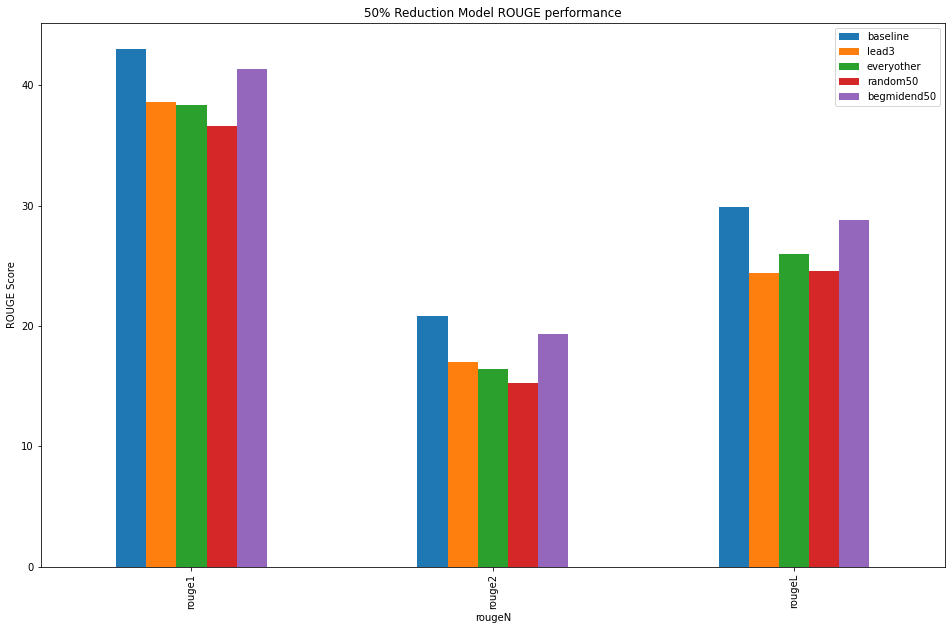

In [ ]:
ax = rouge_aggs1.loc[["rouge1", "rouge2", "rougeL"]].plot(kind="bar", figsize=(16.2, 10), title="50% Reduction Model ROUGE performance")
ax.set_ylabel("ROUGE Score")

In [ ]:
rouge_aggs1.loc[["rouge1", "rouge2", "rougeL"]].T.plot(kind="scatter", x="rouge2", y="rouge1", c=rouge_aggs1.columns)

In [ ]:
rouge_aggs1.loc[["rouge1", "rouge2", "rougeL"]].to_csv("50rougescores.csv")
rouge_aggs1.to_csv("all_rougescores.csv")

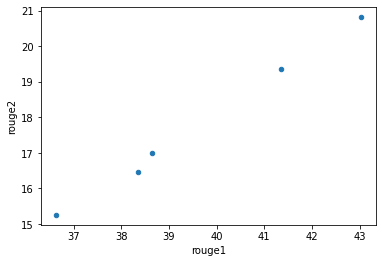

In [ ]:
rouge_aggs1.loc[["rouge1", "rouge2"]].T.plot(kind="scatter", x="rouge1", y="rouge2")

In [ ]:
rouge_agg_frame.loc[("mid", "baseline", "rouge1")]

precision    0.387710
recall       0.510908
fmeasure     0.430208
Name: (mid, baseline, rouge1), dtype: float64

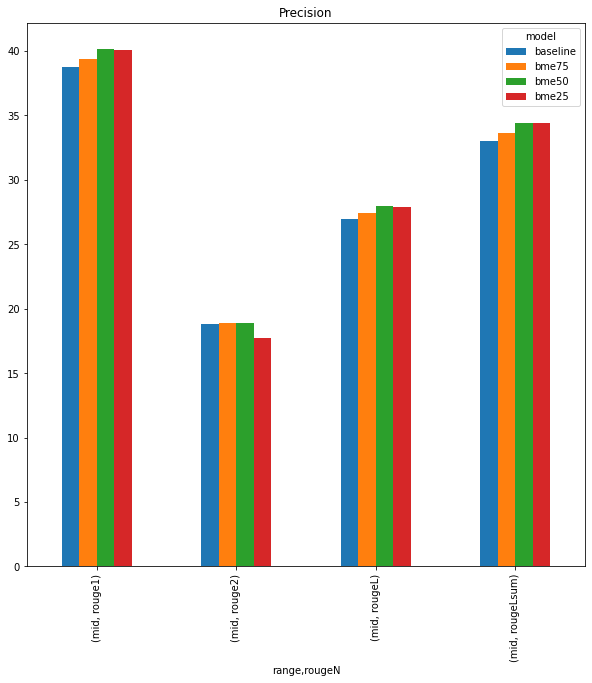

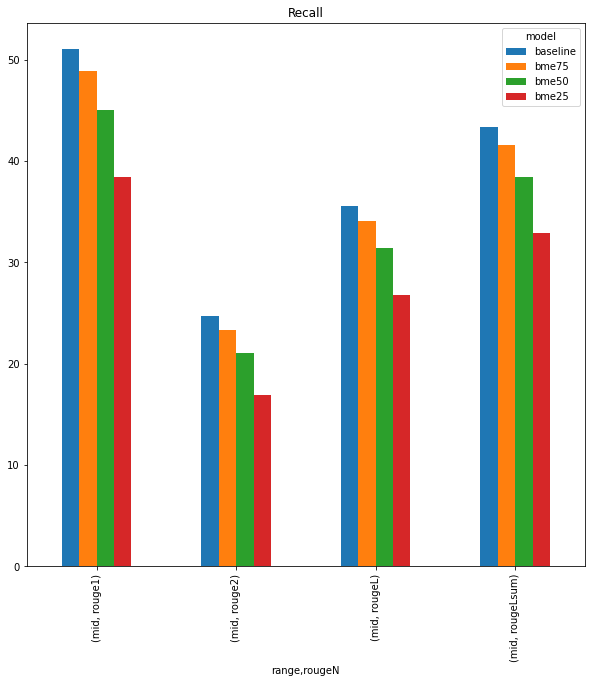

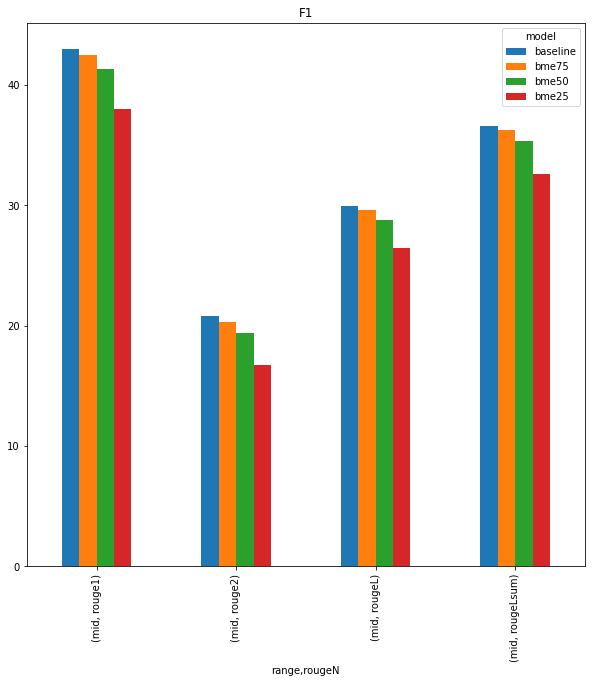

In [ ]:
(rouge_agg_frame.loc[("mid", ["baseline", "bme75", "bme50", "bme25"], slice(None)), "precision"].unstack(1)*100).plot(kind="bar", figsize=(10,10), title="Precision")
(rouge_agg_frame.loc[("mid", ["baseline", "bme75", "bme50", "bme25"], slice(None)), "recall"].unstack(1)*100).plot(kind="bar", figsize=(10,10), title="Recall")
(rouge_agg_frame.loc[("mid", ["baseline", "bme75", "bme50", "bme25"], slice(None)), "fmeasure"].unstack(1)*100).plot(kind="bar", figsize=(10,10), title="F1")

In [ ]:
rouge_agg_frame

precision    recall  fmeasure
range model    rougeN                                  
low   baseline rouge1      0.385270  0.508115  0.427942
mid   baseline rouge1      0.387710  0.510908  0.430208
high  baseline rouge1      0.390250  0.513589  0.432362
low   baseline rouge2      0.185729  0.244363  0.205793
mid   baseline rouge2      0.187948  0.247093  0.208115
...                             ...       ...       ...
      lead3    rougeL      0.208826  0.321799  0.244409
high  lead3    rougeL      0.210722  0.324527  0.246334
low   lead3    rougeLsum   0.272909  0.415511  0.318209
mid   lead3    rougeLsum   0.274849  0.418237  0.320225
high  lead3    rougeLsum   0.276870  0.420915  0.322256

[84 rows x 3 columns]

In [ ]:
rouge_agg_frame.loc["mid"].to_csv("rougeMetrics.csv")

In [ ]:
#baseline_rouge = pd.DataFrame(rouge_dict["baseline"]["rougeL"])

In [ ]:
#baseline_rouge.plot(kind="scatter", x="recall", y="precision")

# Compare Aggregates

In [ ]:
#agg_stats_list = []
#for key, value in rouge_dict.items():
#    df = pd.DataFrame(value["rouge2"]).describe()
#    df["model"] = key
#    df = df.set_index("model", append=True)
#    agg_stats_list.append(df.unstack().stack(0))

In [ ]:
#pd.concat(agg_stats_list, axis=1).reorder_levels([1,0]).sort_index(level=0)

# Coherence
Look at the coherence of summaries.  
What is the relationship between reduction methods and the output summary coherence?

In [ ]:
!pip install -Uq sentence-transformers

     |████████████████████████████████| 85 kB 2.3 MB/s 
     |████████████████████████████████| 4.7 MB 18.9 MB/s 
     |████████████████████████████████| 1.2 MB 53.7 MB/s 
     |████████████████████████████████| 6.6 MB 38.9 MB/s 


In [ ]:
from sentence_transformers import SentenceTransformer, util
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
import spacy
from spacy import displacy
import en_core_web_sm

In [ ]:
nlp = en_core_web_sm.load()

here I define some functions to calculate the document coherence score, as discussed in the paper.

In [ ]:
def sentence_similarity(sentence1, sentence2, ne_weight=0.0):
    # cosine similarity of two sentences
    embeddings1 = sentence_model.encode(sentence1, convert_to_tensor=True)
    embeddings2 = sentence_model.encode(sentence2, convert_to_tensor=True)
    cosine_scores = util.cos_sim(embeddings1, embeddings2)
    cs = cosine_scores[0][0].item()
    # named entity
    doc1 = nlp(sentence1)
    doc2 = nlp(sentence2)
    set1 = set(x.text for x in doc1.ents)
    set2 = set(x.text for x in doc2.ents)
    shared_ents = set1 & set2
    # prevents division by zero if there are no entities in one of the sentences
    if len(shared_ents) == 0:
        ne_similarity = 0
    else:
        normalizer = min(len(set1), len(set2))
        ne_similarity = len(shared_ents) / normalizer

    return ne_weight * ne_similarity + (1 - ne_weight) * cs

In [ ]:
import numpy as np

In [ ]:
def coherence_score(summary, ne_weight=0.0):
    doc = nlp(summary)
    sentences = [sent.text.strip() for sent in doc.sents]
    # if there is only one sentence then coherence is irrelevant
    if len(sentences) <= 1:
        return np.nan
    scores = []
    for s in range(len(sentences) - 1):
        scores.append(sentence_similarity(sentences[s], sentences[s+1], ne_weight=ne_weight))
    summary_coherence_score = sum(scores) / (len(sentences) - 1)
    return summary_coherence_score

In [ ]:
from datasets import Dataset

In [ ]:
all_data_dataset = Dataset.from_pandas(all_data)

I'm taking a random sample of the original dataset because it takes too long to compute over the entire dataset

In [ ]:
import random

In [ ]:
random.seed(42)

In [ ]:
# get a random sample
new_all_dataset_sample = all_data_dataset.select(random.sample(range(11490), 1000))

In [ ]:
new_all_dataset_sample

Dataset({
    features: ['article', 'highlights', 'id', 'article_sent', 'article_sent_len', 'article_sent_words', 'everyother', 'random_sent', 'beg_mid_end', 'beg_mid_end75', 'beg_mid_end25', 'lead3', 'baseline', 'skip', 'bme50', 'random', 'bme25', 'bme75'],
    num_rows: 1000
})

In [ ]:
for summary_style in ["highlights", 'lead3', 'baseline', 'skip', 'bme50', 'random', 'bme25', 'bme75']:
    new_all_dataset_sample = new_all_dataset_sample.map(lambda x: {"{}_coherence50".format(summary_style): coherence_score(x[summary_style], ne_weight=.5)})
    new_all_dataset_sample = new_all_dataset_sample.map(lambda x: {"{}_coherence0".format(summary_style): coherence_score(x[summary_style], ne_weight=0)})

  0%|          | 0/1000 [00:00<?, ?ex/s]

  0%|          | 0/1000 [00:00<?, ?ex/s]

  0%|          | 0/1000 [00:00<?, ?ex/s]

  0%|          | 0/1000 [00:00<?, ?ex/s]

  0%|          | 0/1000 [00:00<?, ?ex/s]

  0%|          | 0/1000 [00:00<?, ?ex/s]

  0%|          | 0/1000 [00:00<?, ?ex/s]

  0%|          | 0/1000 [00:00<?, ?ex/s]

  0%|          | 0/1000 [00:00<?, ?ex/s]

  0%|          | 0/1000 [00:00<?, ?ex/s]

  0%|          | 0/1000 [00:00<?, ?ex/s]

  0%|          | 0/1000 [00:00<?, ?ex/s]

  0%|          | 0/1000 [00:00<?, ?ex/s]

  0%|          | 0/1000 [00:00<?, ?ex/s]

  0%|          | 0/1000 [00:00<?, ?ex/s]

  0%|          | 0/1000 [00:00<?, ?ex/s]

In [ ]:
new_all_dataset_sample_frame = new_all_dataset_sample.to_pandas()

In [ ]:
new_all_dataset_sample_frame.to_csv("subsample.csv")

In [ ]:
new_all_dataset_sample_frame.filter(regex="coherence").describe()

,lead3_coherence,highlights_coherence,skip_coherence,bme50_coherence,random_coherence,bme25_coherence,bme75_coherence,article_coherence
count,1000.000000,994.000000,993.000000,992.000000,990.000000,983.000000,992.000000,1000.000000
mean,0.209319,0.166982,0.158295,0.151514,0.150745,0.147398,0.157663,0.186673
std,0.098322,0.085153,0.094930,0.082941,0.090372,0.089498,0.082568,0.049062
min,0.010576,-0.018531,-0.013414,-0.013591,-0.023003,-0.034594,-0.059078,0.091776
25%,0.144822,0.116731,0.103131,0.100143,0.097308,0.091358,0.105782,0.152297
50%,0.192845,0.147055,0.136820,0.136209,0.132085,0.130857,0.142031,0.179807
75%,0.253926,0.193461,0.186151,0.183216,0.183977,0.182242,0.192268,0.211991
max,0.709059,0.717583,0.743124,0.728202,0.801009,0.839842,0.832571,0.421355


In [ ]:
new_all_dataset_sample_frame

,article,highlights,id,article_sent,article_sent_len,article_sent_words,everyother,random_sent,beg_mid_end,beg_mid_end75,...,skip_coherence50,skip_coherence0,bme50_coherence50,bme50_coherence0,random_coherence50,random_coherence0,bme25_coherence50,bme25_coherence0,bme75_coherence50,bme75_coherence0
0,President Barack Obama invited the Super Bowl ...,Brady cited 'prior family commitments' in bowi...,ebd2dd309bbe226bd2a6af82cc2829256eeb0fe3,[President Barack Obama invited the Super Bowl...,131,"[[President, Barack, Obama, invited, the, Supe...",President Barack Obama invited the Super Bowl ...,The Patriots assembled behind him groaned. His...,President Barack Obama invited the Super Bowl ...,President Barack Obama invited the Super Bowl ...,...,0.283052,0.399438,0.517113,0.534226,0.105538,0.211076,0.122748,0.245495,0.181569,0.363138
1,Rangers have promised to probe claims Mike Ash...,Reports emerged on social media suggesting Mi...,66e0218045ebd3972b831324f1b59a6eb7b71b15,[Rangers have promised to probe claims Mike As...,105,"[[Rangers, have, promised, to, probe, claims, ...",Rangers have promised to probe claims Mike Ash...,Ashley was given security over the icons and l...,Rangers have promised to probe claims Mike Ash...,Rangers have promised to probe claims Mike Ash...,...,0.119108,0.238215,0.136079,0.272159,0.128121,0.256243,0.137249,0.274497,0.155210,0.310420
2,(CNN)He was known as the American mouthpiece o...,"In his final known video, Adam Gadahn called f...",9dd47572c19820a82c1ec52db92a801c10b5b93c,[(CNN)He was known as the American mouthpiece ...,46,"[[(CNN)He, was, known, as, the, American, mout...",(CNN)He was known as the American mouthpiece o...,Neither he nor Ahmed Farouq -- another U.S. ci...,(CNN)He was known as the American mouthpiece o...,(CNN)He was known as the American mouthpiece o...,...,0.081212,0.162424,NaN,NaN,0.165076,0.246819,0.036279,0.072558,0.065361,0.130723
3,They were a hit together at Liverpool on the p...,John Barnes appeared as a guest on Sky's A Lea...,8f1ee28a99da5582e5fff500c2e72b81b302a62b,[They were a hit together at Liverpool on the ...,103,"[[They, were, a, hit, together, at, Liverpool,...",They were a hit together at Liverpool on the p...,Redknapp (left) and Barnes played together at ...,They were a hit together at Liverpool on the p...,They were a hit together at Liverpool on the p...,...,0.117605,0.235210,0.075769,0.151538,0.118365,0.236730,0.074509,0.149017,0.145689,0.291378
4,Crucible thoroughbreds John Higgins and Graeme...,John Higgins beats Robert Milkins 10-5 to reac...,6113e9d4732c98760229df50773df417b3f4f540,[Crucible thoroughbreds John Higgins and Graem...,103,"[[Crucible, thoroughbreds, John, Higgins, and,...",Crucible thoroughbreds John Higgins and Graeme...,"'You doubt yourself definitely, especially in ...",Crucible thoroughbreds John Higgins and Graeme...,Crucible thoroughbreds John Higgins and Graeme...,...,0.047005,0.094010,0.093466,0.186933,0.218283,0.311565,0.093466,0.186933,0.079981,0.159963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Die-hard fans of the hit BBC series Poldark ar...,Interest in the hit BBC series Poldark has giv...,03c621e7a96f9fb6f208df3446a6c5cc9c82c2ba,[Die-hard fans of the hit BBC series Poldark a...,195,"[[Die-hard, fans, of, the, hit, BBC, series, P...",Die-hard fans of the hit BBC series Poldark ar...,Scroll down for video . Smuggling was rife in ...,Die-hard fans of the hit BBC series Poldark ar...,Die-hard fans of the hit BBC series Poldark ar...,...,0.285674,0.404681,0.130223,0.260445,0.098185,0.196369,0.153627,0.307254,0.118112,0.236224
996,A masked gunman who fired eight shots in a sho...,Gunman on the run since 2pm Saturday afternoon...,b1869e4f1033e24f83158ac58f27176cce3e80f8,[A masked gunman who fired eight shots in a sh...,93,"[[A, masked, gunman, who, fired, eight, shots,...",A masked gunman who fired eight shots in a sho...,A masked gunman who fired eight shots in a sho...,A masked g

In [ ]:
new_all_dataset_sample_frame.filter(regex="coherence").mean().to_csv("avg_coh.csv")

There isn't really a difference in coherence rank based on named entity weight. Below I explore the coherence scores.

In [ ]:
new_all_dataset_sample_frame.filter(regex="coherence50").mean().rank(ascending=False).sort_values()

lead3_coherence50         1.0
highlights_coherence50    2.0
baseline_coherence50      3.0
skip_coherence50          4.0
bme75_coherence50         5.0
bme50_coherence50         6.0
random_coherence50        7.0
bme25_coherence50         8.0
dtype: float64

In [ ]:
new_all_dataset_sample_frame.filter(regex="coherence0").mean().rank(ascending=False).sort_values()

lead3_coherence0         1.0
highlights_coherence0    2.0
baseline_coherence0      3.0
bme75_coherence0         4.0
skip_coherence0          5.0
bme50_coherence0         6.0
random_coherence0        7.0
bme25_coherence0         8.0
dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


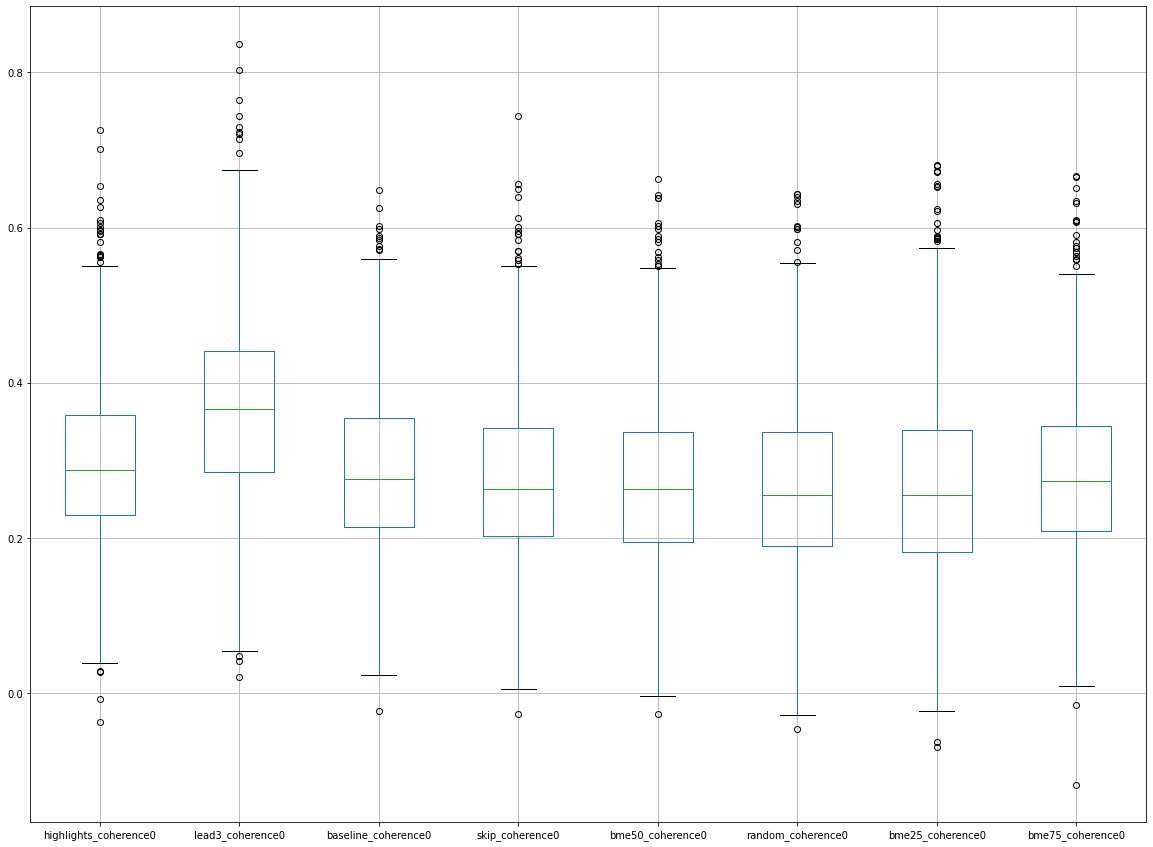

In [ ]:
new_all_dataset_sample_frame.filter(regex="coherence0").boxplot(figsize=(20, 15))

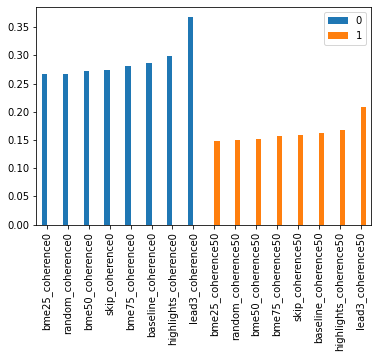

In [ ]:
c50 = new_all_dataset_sample_frame.filter(regex="coherence0").mean().sort_values()
c0 = new_all_dataset_sample_frame.filter(regex="coherence50").mean().sort_values()
pd.concat([c50, c0], axis=1).plot(kind="bar")

In [ ]:
c50

bme25_coherence0         0.267044
random_coherence0        0.267846
bme50_coherence0         0.272465
skip_coherence0          0.274013
bme75_coherence0         0.281857
baseline_coherence0      0.286768
highlights_coherence0    0.299000
lead3_coherence0         0.367279
dtype: float64

In [ ]:
new_all_dataset_sample_frame.filter(regex="coherence").describe()

,highlights_coherence50,highlights_coherence0,lead3_coherence50,lead3_coherence0,baseline_coherence50,baseline_coherence0,skip_coherence50,skip_coherence0,bme50_coherence50,bme50_coherence0,random_coherence50,random_coherence0,bme25_coherence50,bme25_coherence0,bme75_coherence50,bme75_coherence0
count,994.000000,994.000000,1000.000000,1000.000000,997.000000,997.000000,993.000000,993.000000,992.000000,992.000000,990.000000,990.000000,983.000000,983.000000,992.000000,992.000000
mean,0.166982,0.299000,0.209319,0.367279,0.161791,0.286768,0.158295,0.274013,0.151514,0.272465,0.150745,0.267846,0.147398,0.267044,0.157663,0.281857
std,0.085153,0.105770,0.098322,0.122902,0.079627,0.103668,0.094930,0.108946,0.082941,0.109083,0.090372,0.114351,0.089498,0.121208,0.082568,0.107983
min,-0.018531,-0.037063,0.010576,0.021152,-0.011224,-0.022448,-0.013414,-0.026829,-0.013591,-0.027181,-0.023003,-0.046005,-0.034594,-0.069188,-0.059078,-0.118156
25%,0.116731,0.229314,0.144822,0.284543,0.109193,0.213580,0.103131,0.202702,0.100143,0.195296,0.097308,0.190107,0.091358,0.181740,0.105782,0.208781
50%,0.147055,0.287663,0.192845,0.366082,0.144779,0.276362,0.136820,0.262707,0.136209,0.263419,0.132085,0.255568,0.130857,0.255559,0.142031,0.273740
75%,0.193461,0.357994,0.253926,0.441332,0.195774,0.354224,0.186151,0.342318,0.183216,0.336334,0.183977,0.335998,0.182242,0.339114,0.192268,0.344786
max,0.717583,0.725873,0.709059,0.837089,0.619583,0.648567,0.743124,0.744094,0.728202,0.662779,0.801009,0.642678,0.839842,0.680770,0.832571,0.666744


# Cosine Similarity
here I calculate the cosine similarity between all summaries. In the paper, I only report on the cosine similarity between the human-generated summary and each machine-generated summary.

In [ ]:
from itertools import combinations
from collections import defaultdict

In [ ]:
dd = defaultdict(list)
for index, row in new_all_dataset_sample_frame.iterrows():
    for x, y in list(combinations(["highlights", 'lead3', 'baseline', 'skip', 'bme50', 'random', 'bme25', 'bme75'], 2)):
        simscore = sentence_similarity(row[x], row[y])
        dd["{}_{}".format(x, y)].append(simscore)

In [ ]:
cosine_sim_summaries = pd.DataFrame(dd)

In [ ]:
cosine_sim_summaries.to_csv("cosine_similarities.csv")

In [ ]:
cosine_sim_summaries = pd.read_csv("/content/drive/MyDrive/NLPFinal/Take2/cosine_similarities.csv", index_col=0)

In [ ]:
cssm = cosine_sim_summaries.mean()

In [ ]:
cssm

highlights_lead3       0.740498
highlights_baseline    0.767380
highlights_skip        0.721574
highlights_bme50       0.750472
highlights_random      0.697355
highlights_bme25       0.714992
highlights_bme75       0.765086
lead3_baseline         0.788914
lead3_skip             0.746655
lead3_bme50            0.796405
lead3_random           0.696463
lead3_bme25            0.785809
lead3_bme75            0.793270
baseline_skip          0.795773
baseline_bme50         0.868316
baseline_random        0.764659
baseline_bme25         0.802122
baseline_bme75         0.904571
skip_bme50             0.775922
skip_random            0.716545
skip_bme25             0.726756
skip_bme75             0.791685
bme50_random           0.742464
bme50_bme25            0.833465
bme50_bme75            0.884722
random_bme25           0.707688
random_bme75           0.760255
bme25_bme75            0.813833
dtype: float64

In [ ]:
cssm.index = pd.MultiIndex.from_tuples([(x, y) for x,y in cssm.index.str.split("_")])

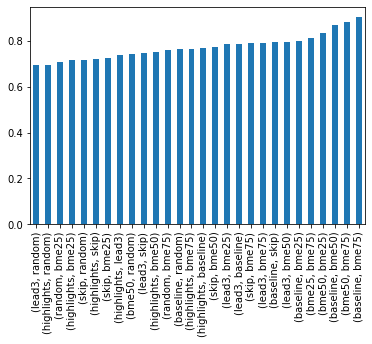

In [ ]:
cssm.sort_values().plot(kind="bar")

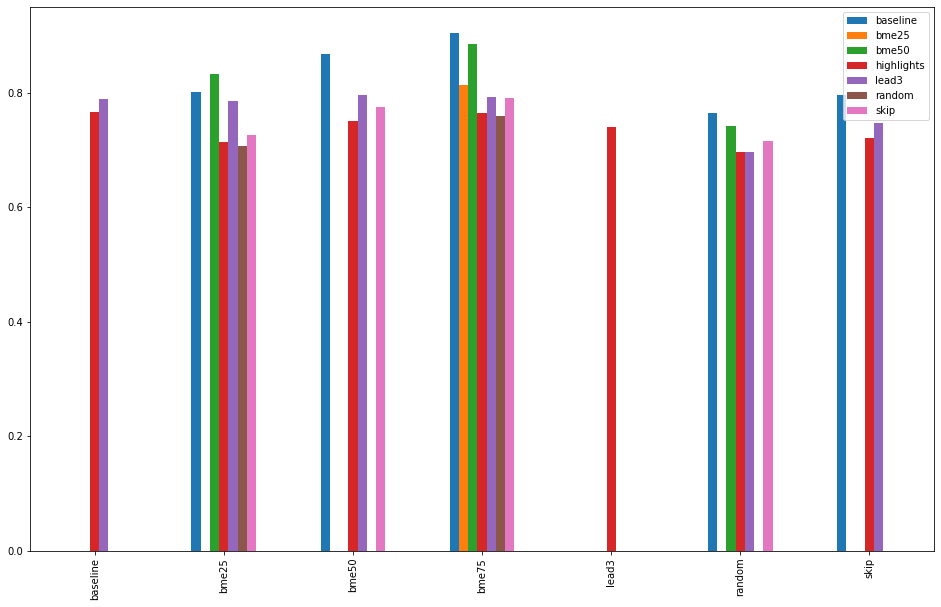

In [ ]:
cssm.unstack(0).plot(kind="bar", figsize=(16.2, 10))

In [ ]:
cssm.unstack().to_csv("cosine_sim_mean_matrix.csv")

In [ ]:
lens = new_all_dataset_sample_frame["article_sent"].apply(len)

In [ ]:
lens.describe()

count    1000.000000
mean       33.156000
std        19.527032
min         6.000000
25%        19.000000
50%        28.000000
75%        42.000000
max       121.000000
Name: article_sent, dtype: float64